# Investigating TMDb Movies Dataset

In this project, we will investigate a TMDb Movie dataset curated from Udacity. The goal of this project is to investigate different areas of the dataset from multiple angles using the python libraries numpy, pandas, and matplotlib. 

### The Dataset

The TMDb Movies Dataset was obtained from the Udacity Data Analyst Nanodegree Program. The dataset contains information on over 10,000 movies from 1966-2015. The dataset contains 10,866 rows and 21 columns. The dataset contains null values, 0 values, and content that is not need for the analysis. To get the dataset ready for analysis it will need to be wrangled and cleaned.

### Research Questions

<b> What are the top 10 produced movie genres of all time? </b>

<b> Explore the top 2 genres </b>

-What is the average runtime?

-What is the average revenue?

-Is this genre of movies being produced at an increasing rate?

-Is the average popularity of these movies increasing?

-Has the budget increased over time?

-Has the revenue increased over time?




<b> Which directors have made the most movies? </b>

<b> Explore the top 2 directors </b>

-What genres do they direct?

-What is the average revenue for their movies?

-What are their 10 highest revenue films?

-Are their newer films generating more revenue?

-What are their 10 most popular films?

-Are their films getting more popular over time?

-What runtime correlates to their highest popularity?

## Data Wrangling and Cleaning

Import relevant libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import csv
df = pd.read_csv("tmdb-movies.csv")
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Drop unwanted columns

In [3]:
# Drop unwanted columns
df.drop(["imdb_id", "id", "homepage", "tagline", "overview", "keywords", "cast", "production_companies", "budget_adj", "revenue_adj"], axis = "columns", inplace = True)

In [4]:
# Check for dropped columns
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [5]:
# Check data types
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object

Release_date is stored as an object, this needs to be changed to datetime.

In [6]:
# Change release date to a datetime object
df["release_date"] = pd.to_datetime(df["release_date"])

In [7]:
# Check data types for change
df.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

Check for duplicates and drop them if they are present

In [8]:
# Check for duplicates
sum(df.duplicated())

1

In [9]:
# Drop duplicates
df.drop_duplicates(inplace = True)

Check for null values and decide what to do with them

In [10]:
# Check for null values
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [11]:
# Check statistics of the DataFrame using .describe() method
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


There are zero zalues for the minimum of budget, revenue, and runtime. I am going to explore the presence of these zero values.

In [15]:
# Check for zero values in the budget 
budget_zero = df.query("budget == 0")
# Look at 1% of the zeros 
budget_zero.sample(frac = .01)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
7261,0.021222,0,0,Matando Cabos,Alejandro Lozano,94,Action|Adventure|Comedy|Crime|Foreign,2004-07-16,13,7.4,2004
5809,0.275427,0,0,Call Me Crazy: A Five Film,Laura Dern|Bryce Dallas Howard|Bonnie Hunt|Ash...,90,Drama,2013-04-20,13,5.5,2013
1102,0.212841,0,0,Preservation,Christopher Denham,90,Thriller|Horror,2014-08-22,35,5.1,2014
10340,0.298960,0,9532895,Matinee,Joe Dante,99,Comedy|Drama,1993-01-29,15,6.0,1993
3593,0.492646,0,0,Megamind: The Button Of Doom,Simon J. Smith,16,Animation|Action|Comedy|Family,2011-02-25,26,6.2,2011
6535,0.145446,0,0,The Poseidon Adventure,John Putch,173,Adventure|Drama|Thriller|Action,2005-11-20,13,3.9,2005
4890,0.083202,0,0,Cousin Ben Troop Screening,Wes Anderson,2,NaN,2012-01-01,14,7.0,2012
146,1.065888,0,17671101,Regression,Alejandro AmenÃ¡bar,106,Horror|Mystery|Thriller,2015-10-01,310,5.2,2015
10137,0.083697,0,0,The Day the Earth Caught Fire,Val Guest,98,Science Fiction|Drama,2061-11-01,13,7.2,1961
1244,0.082565,0,0,The Guvnors,Gabe Turner,95,Crime|Thriller,2014-06-24,16,5.4,2014


In [16]:
# Check for zero values in the revenue 
revenue_zero = df.query("revenue == 0")
# Look at 1% of the zeros 
revenue_zero.sample(frac = .01)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
2847,0.150234,0,0,Winning London,Craig Shapiro,93,Comedy|Family,2001-03-27,27,5.7,2001
4338,0.138630,0,0,Crooklyn,Spike Lee,115,Comedy|Drama,1994-05-13,11,5.6,1994
272,0.454151,0,0,Deathgasm,Jason Lei Howden,86,Comedy|Horror,2015-08-28,83,6.5,2015
6127,0.476896,0,0,Death Wish 3,Michael Winner,92,Adventure|Drama|Action|Thriller|Crime,1985-11-01,27,5.4,1985
571,0.283128,0,0,Wildlike,Frank Hall Green,104,Thriller|Adventure|Drama,2015-09-25,25,6.5,2015
8195,0.314238,0,0,The Babysitter,Guy Ferland,90,Drama|Thriller,1995-10-17,14,4.6,1995
1817,0.164377,5000,0,The Hunt for Gollum,Chris Bouchard,38,Action|Adventure|Fantasy,2009-05-04,16,5.9,2009
1773,0.428574,0,0,ZMD: Zombies of Mass Destruction,Kevin Hamedani,92,Horror,2009-01-01,14,3.7,2009
8927,0.360746,0,0,Honkytonk Man,Clint Eastwood,122,Western|Comedy|Drama|Music,1982-12-15,13,5.2,1982
152,1.027620,0,0,The Voices,Marjane Satrapi,101,Horror|Thriller|Comedy|Crime,2015-02-06,371,6.0,2015


In [17]:
# Check for zero values in the runtime 
runtime_zero = df.query("runtime == 0")
# Look at length of the zero values
len(runtime_zero)

31

Replace zeros with null values in budget and revenue to keep the integrity of the data

In [18]:
# Replace zero with null for budget and revenue
df["budget"] = df["budget"].replace(0, np.NaN)
df["revenue"] = df["revenue"].replace(0, np.NaN)

Drop runtime values of 0 because there are not a lot of them

In [19]:
# Query runtime for all non zero values and keep them
df.query("runtime != 0", inplace = True)

In [20]:
# Check for drop, query runtime == 0
df.query("runtime == 0")

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year


Drop null values in director and genre

In [21]:
# drop null in director and genres
drop_list = ["director", "genres"]
df.dropna(subset = drop_list, how = "any", inplace = True)

In [22]:
# Check results
df.isnull().sum()

popularity           0
budget            5611
revenue           5924
original_title       0
director             0
runtime              0
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

In [109]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


## What are the Top 10 Produced Movie Genres All Time?

In [23]:
df.head(3)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015


Generate a value count to see the most produced genres using the .value_counts() method. I decided to not split the values after the "|" because there is distinction between genres and subgenres, for instance Horror movies differ from Horror|Thriller movies.

In [24]:
# Get a value count for the genres
genre_count = df["genres"].value_counts()
genre_count.head(20)

Drama                   711
Comedy                  704
Documentary             305
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          267
Horror|Thriller         259
Horror                  249
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             91
Animation|Family         89
Crime|Drama|Thriller     81
Crime|Drama              74
Comedy|Horror            71
Drama|Comedy|Romance     64
Action                   63
Name: genres, dtype: int64

<b> What are the top 10 produced genres? </b>

Below you will see the distribution of genres produced in a pie chart. Drama and Comedy are the most produced movies of all time.

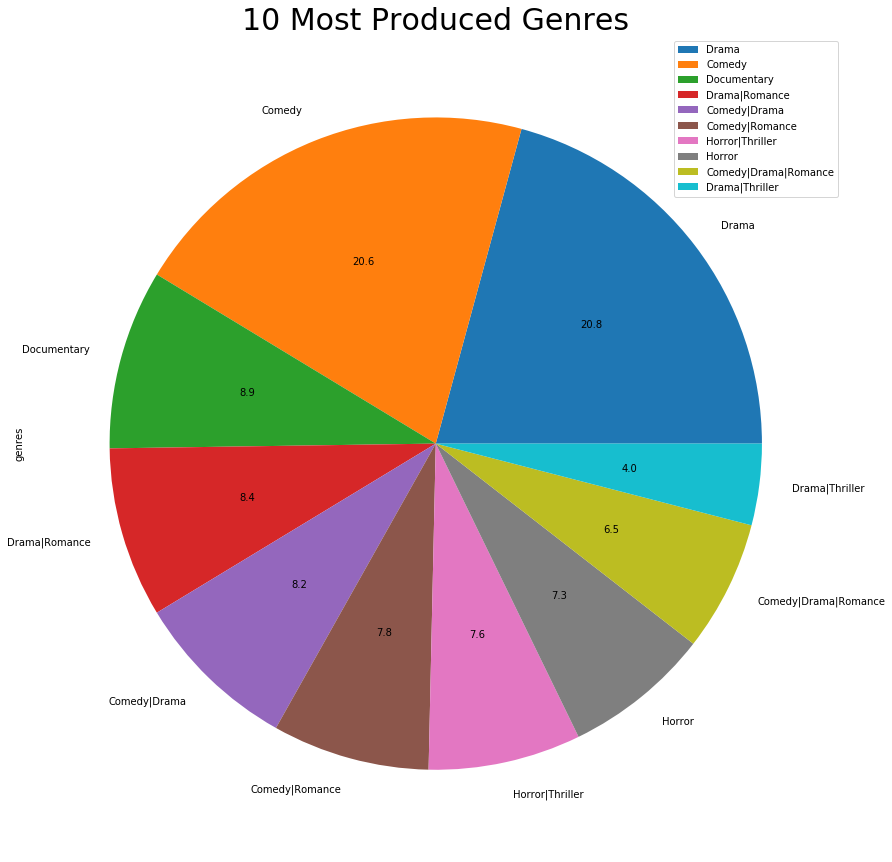

In [126]:
# Create a pie chart for the top ten genres of all time
genre_count.head(10).plot(kind = "pie", autopct ='%.1f', figsize = (15,15))
plt.title("10 Most Produced Genres", size = 30)
plt.legend();

## Explore the Most Produced Genre of All Time: Drama

I extracted the data by querying the data frame for all genres that correspond to drama, using the .query() method.

In [26]:
# Do a query to extract all movies under the drama genre
drama = df.query("genres == 'Drama'")
drama.head(5)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
55,2.584264,20000000.0,36606743.0,Burnt,John Wells,100,Drama,2015-10-02,631,6.3,2015
58,2.557859,15000000.0,64191523.0,The Danish Girl,Tom Hooper,120,Drama,2015-11-27,867,7.3,2015
68,2.331567,35000000.0,137935567.0,Creed,Ryan Coogler,133,Drama,2015-11-25,1171,7.3,2015
77,2.121884,35000000.0,48623572.0,Concussion,Peter Landesman,123,Drama,2015-11-12,500,6.9,2015
96,1.823130,11930000.0,18340000.0,The Dressmaker,Jocelyn Moorhouse,118,Drama,2015-10-01,197,6.9,2015


I extracted the statistics of the drama movies using the .describe() method

<b> What is the average runtime of drama movies? </b>

111.72 minutes

<b> What is the average revenue of drama movies? </b>

$45,642,090

In [27]:
# Look at the statistics using .describe() method
drama.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,711.000000,3.170000e+02,3.310000e+02,711.000000,711.000000,711.000000,711.000000
mean,0.507554,1.825644e+07,4.564209e+07,111.725738,136.687764,6.318284,2003.513361
std,0.579070,1.986337e+07,7.505477e+07,24.571469,347.438666,0.804847,12.670006
min,0.003731,2.500000e+01,1.300000e+01,6.000000,10.000000,3.500000,1960.000000
25%,0.201240,4.600000e+06,1.973997e+06,98.000000,15.000000,5.800000,1999.000000
50%,0.351379,1.200000e+07,1.485939e+07,109.000000,31.000000,6.400000,2008.000000
75%,0.597035,2.500000e+07,5.230819e+07,122.000000,101.000000,6.900000,2013.000000
max,8.947905,1.300000e+08,6.118994e+08,336.000000,5923.000000,8.400000,2015.000000


<b> What length are most drama movies? </b>

To look at this I created a function that ranks each movie as either short, medium, or long. To determine what constitutes are short, medium, or long movie, I looked at the statistics for the runtime column using the .describe() method. A medium length movie is a movie that falls within the mean to one standard deviation each way, so 73 minutes to 131 minutes. A short movie falls below one standard deviaton, 72 minutes or below. A long movie falls above one standard deviation, 132 minutes or above. 

Drama movies are mostly medium length.

In [117]:
# Ranking movie length for each movie
def movie_length(row):
    
    runtime = row[5]
    if runtime >= 132:
        return "Long"
    elif runtime <= 72:
        return "Short"
    else:
        return "Medium"

# Apply for row, so set to columns
drama_length = drama.apply(movie_length, axis = "columns").value_counts()

In [118]:
drama_length

Medium    608
Long       97
Short       6
dtype: int64

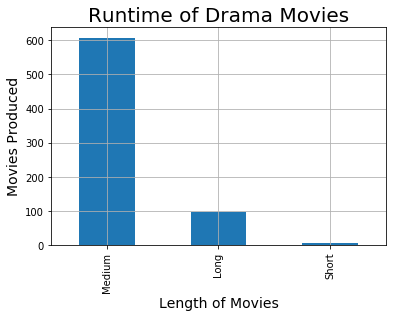

In [129]:
drama_length.plot.bar()
plt.xlabel('Length of Movies', size = 14)
plt.ylabel('Movies Produced' ,size = 14)
plt.title('Runtime of Drama Movies', size = 20)
plt.grid(True)
plt.show();

<b> Are drama movies being produced at an increasing rate? </b>

To determine this I created a histogram plotted by release year. From the histogram it is evident that Drama Movies are being produced at an increasing rate. From 1960 to 2015 the production of drama movies has increased drastically.

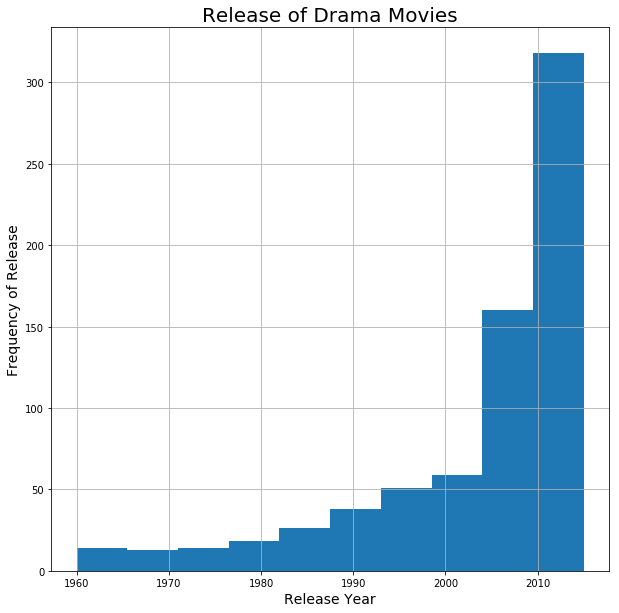

In [133]:
# Are drama movies being produced at an increasing rate?
# Plot the frequency by release year
drama["release_year"].plot(kind="hist", bins = 10,  figsize = (10, 10))
plt.xlabel('Release Year',size = 14)
plt.ylabel('Frequency of Release',size = 14)
plt.title("Release of Drama Movies", size = 20)
plt.grid(True);

<b> Is the average popularity of drama movies is increasing? </b>

To acheive this analysis I grouped my drama data frame for release year then took the mean of the popularity. You can see the results below in the form of a line chart.

The overall trend the line chart shows is that the average popularity is increasing. There is some variation in the trend, especially in years where there was a widely popular drama movies, as seen in the mid 1970's and the late 1990's.

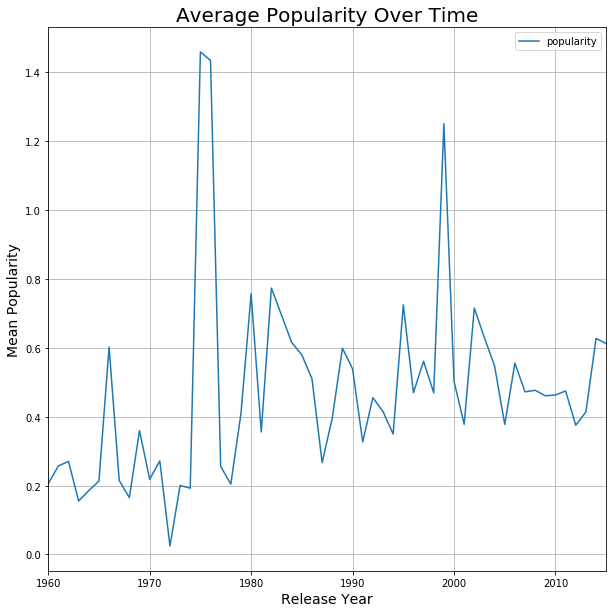

In [134]:
# Are drama movies becoming more popular?
drama.groupby("release_year")["popularity"].mean().plot(kind = "line",  figsize = (10, 10))
plt.xlabel('Release Year',size = 14)
plt.ylabel('Mean Popularity',size = 14)
plt.title("Average Popularity Over Time", size = 20)
plt.grid(True)
plt.legend();

<b> Has the budget for drama movies increased over time? </b>

To analyze this I used a scatter plot where the x-axis is the release year and the y-axis is the budget. 

The budget of drama movies has significantly increased over time. The peak years for high budget drama movies is between 2000-2010 where several movies have a budget of over $100,000,000.

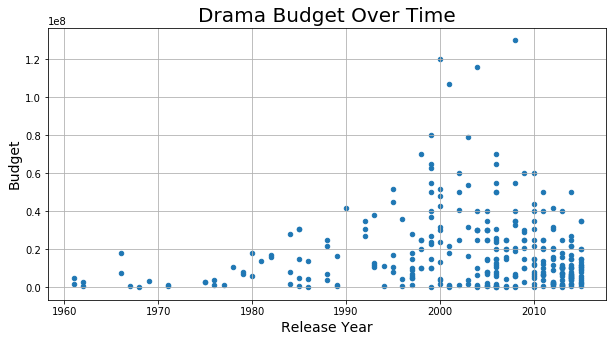

In [175]:
# Has the budget for drama movies increased over time?
drama.plot(x = "release_year", y = "budget", kind = "scatter", figsize = (10, 5))
plt.xlabel('Release Year',size = 14)
plt.ylabel('Budget',size = 14)
plt.title("Drama Budget Over Time", size = 20)
plt.grid(True);

In [31]:
drama["budget"].nlargest(10)

2915    130000000.0
8730    120000000.0
6983    116000000.0
2721    107000000.0
2463     80000000.0
5013     79000000.0
6676     70000000.0
9060     70000000.0
2429     65000000.0
6619     65000000.0
Name: budget, dtype: float64

<b> Has the revenue for drama movies increased over time? </b>

To analyze this I used a scatter plot where the x-axis is the release year and the y-axis is the revenue.

The revenue of drama movies has increased over time but has plateued near $400,000, other than one movie who's revenue was 611,899,420. Drama movies began reaching this threshold of revenue in the late 1980's and more consistently reached it through the 1990's and 2000's.

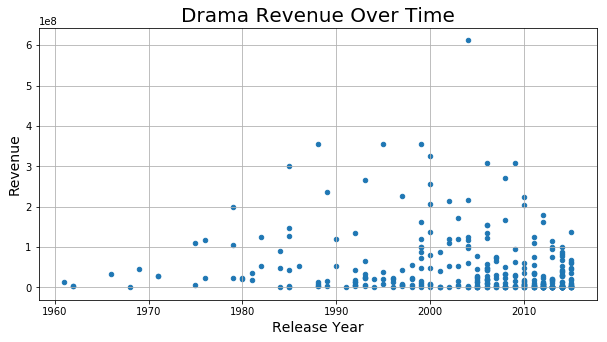

In [138]:
# Has the average revenue for drama movies increased over time?
drama.plot(x = "release_year", y = "revenue", kind = "scatter", figsize = (10, 5))
plt.xlabel('Release Year',size = 14)
plt.ylabel('Revenue',size = 14)
plt.title("Drama Revenue Over Time", size = 20)
plt.grid(True);

In [40]:
drama["revenue"].nlargest(10)

7073     611899420.0
2411     356296601.0
8076     355237933.0
9454     354825435.0
8730     325756637.0
1403     309208309.0
6631     307077295.0
6091     300473716.0
2888     269958228.0
10312    266614059.0
Name: revenue, dtype: float64

## Explore the Second Most Produced Genre of All Time: Comedy

I extracted the data by querying the data frame for all genres that correspond to drama, using the .query() method.

In [33]:
# Do a query to extract all movies under the drama genre
comedy = df.query("genres == 'Comedy'")
comedy.head(10)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
26,4.564549,68000000.0,215863606.0,Ted 2,Seth MacFarlane,115,Comedy,2015-06-25,1666,6.3,2015
51,2.814802,35000000.0,194564672.0,The Intern,Nancy Meyers,121,Comedy,2015-09-24,1255,7.1,2015
69,2.317670,35000000.0,140795793.0,Trainwreck,Judd Apatow,125,Comedy,2015-07-17,849,6.1,2015
78,2.096273,25000000.0,52395996.0,The Night Before,Jonathan Levine,100,Comedy,2015-11-20,363,6.1,2015
91,1.904898,50000000.0,240360392.0,Daddy's Home,Sean Anders,96,Comedy,2015-12-25,568,5.7,2015
104,1.532997,30000000.0,49263404.0,Entourage,Doug Ellin,104,Comedy,2015-06-03,364,6.2,2015
105,1.510096,23000000.0,79799880.0,The Wedding Ringer,Jeremy Garelick,101,Comedy,2015-01-16,446,6.5,2015
117,1.376605,30000000.0,105011053.0,Sisters,Jason Moore,118,Comedy,2015-12-18,399,5.9,2015
128,1.293140,NaN,2500431.0,Mistress America,Noah Baumbach,84,Comedy,2015-08-14,132,6.4,2015
163,0.927339,40000000.0,106511453.0,Get Hard,Etan Cohen,100,Comedy,2015-03-26,661,5.9,2015


Extract statistics of the comedy movies using the .describe() method

<b> What is the average runtime of comedy movies? </b>

93.66 minutes

<b> What is the average revenue of comedy movies? </b>

$67,521,230

In [34]:
# Look at the statistics
comedy.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,704.000000,2.910000e+02,3.010000e+02,704.000000,704.000000,704.000000,704.000000
mean,0.531651,2.324817e+07,6.752123e+07,93.661932,142.971591,5.822869,2002.460227
std,0.631905,2.147148e+07,7.402014e+07,14.036406,303.835509,0.899756,11.819583
min,0.000620,5.000000e+00,2.700000e+01,8.000000,10.000000,2.300000,1960.000000
25%,0.168737,6.500000e+06,1.370000e+07,88.000000,15.000000,5.300000,1996.000000
50%,0.330875,1.800000e+07,4.044244e+07,94.000000,35.000000,5.800000,2006.000000
75%,0.649049,3.500000e+07,9.377252e+07,101.000000,120.250000,6.400000,2012.000000
max,6.668990,1.120000e+08,4.592706e+08,135.000000,4134.000000,8.500000,2015.000000


<b> What length are most comedy movies? </b>

To look at this I created a function that ranks each movie as either short, medium, or long. To determine what constitutes are short, medium, or long movie, I looked at the statistics for the runtime column using the .describe() method. A medium length movie is a movie that falls within the mean to one standard deviation each way, so 73 minutes to 131 minutes. A short movie falls below one standard deviaton, 72 minutes or below. A long movie falls above one standard deviation, 132 minutes or above. 

Comedy movies are predominantly of medium length.

In [122]:
# Ranking movie length for each movie by creating a function
def movie_length(row):
    
    runtime = row[5]
    if runtime >= 132:
        return "Long"
    elif runtime <= 72:
        return "Short"
    else:
        return "Medium"

# Apply for row, so set to columns
comedy_length = comedy.apply(movie_length, axis = "columns").value_counts()

In [123]:
comedy_length

Medium    658
Short      42
Long        4
dtype: int64

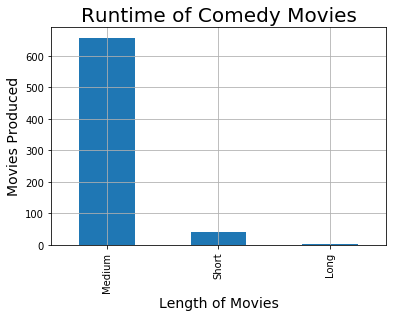

In [140]:
comedy_length.plot.bar()
plt.xlabel('Length of Movies', size = 14)
plt.ylabel('Movies Produced' ,size = 14)
plt.title('Runtime of Comedy Movies', size = 20)
plt.grid(True)
plt.show();

<b> Are comedy movies being produced at an increasing rate? </b>

To determine this I created a histogram plotted by release year.

From the histogram it is evident that comedy movies are being produced at an increasing rate. The only area where there is not an positive trend is from the late 1980's to the early 1990's. From 1960 to 2015 the production of comedy movies has increased very significantly.

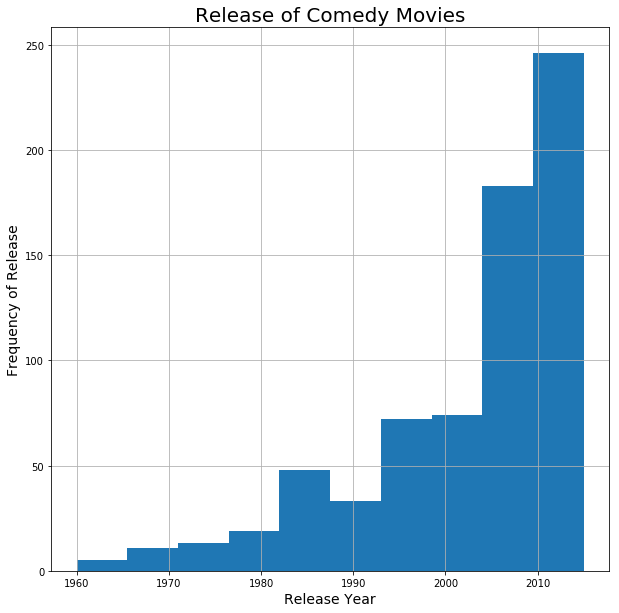

In [142]:
# Are comedy movies being produced at an increasing rate?
# Plot the value counts by release year
comedy["release_year"].plot(kind="hist", bins = 10,  figsize = (10, 10))
plt.xlabel('Release Year',size = 14)
plt.ylabel('Frequency of Release',size = 14)
plt.title("Release of Comedy Movies", size = 20)
plt.grid(True);

<b> Is the average popularity of comedy movies is increasing? </b>

To acheive this analysis I grouped my comedy data frame for release year then took the mean of the popularity. You can see the results below in the form of a line chart.

The overall trend the line chart shows is that the trend is positive, average popularity is increasing. An interesting variation noticed in the data is that there is a spike nearly every twenty years correlating to releases of very popular comedy movies.

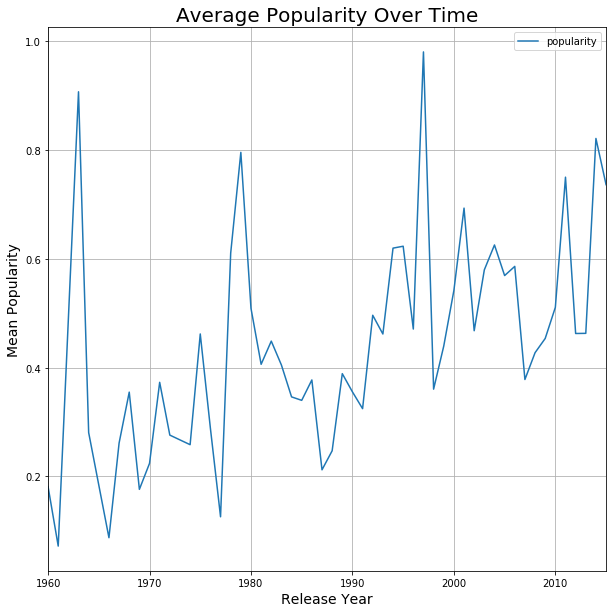

In [143]:
# On average are comedy movies becoming more popular?
comedy.groupby("release_year")["popularity"].mean().plot(kind = "line", figsize = (10, 10))
plt.xlabel('Release Year',size = 14)
plt.ylabel('Mean Popularity',size = 14)
plt.title("Average Popularity Over Time", size = 20)
plt.grid(True)
plt.legend();

<b> Has the budget for comedy movies increased over time? </b>

To analyze this I used a scatter plot where the x-axis is the release year and the y-axis is the budget. 

The scatter plot shows that the budget for comedy has increased over time, especially during the 1990's and 2000's. The early 2000's saw several movies with budgets of over $100,000,000.

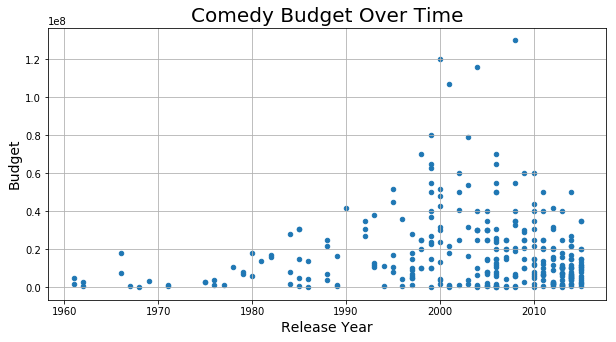

In [145]:
# Has the budget for comedy movies increased over time?
drama.plot(x = "release_year", y = "budget", kind = "scatter", figsize = (10, 5))
plt.xlabel('Release Year',size = 14)
plt.ylabel('Budget',size = 14)
plt.title("Comedy Budget Over Time", size = 20)
plt.grid(True);

In [42]:
comedy["budget"].nlargest(10)

1978    112000000.0
5482    103000000.0
6280    100000000.0
1954     80000000.0
2462     80000000.0
3395     80000000.0
5481     80000000.0
7025     80000000.0
3447     79000000.0
2460     75000000.0
Name: budget, dtype: float64

<b> Has the revenue for drama movies increased over time? </b>

To analyze this I used a scatter plot where the x-axis is the release year and the y-axis is the revenue.

The scatter plot shows a positive trend for revenue increase over time. Comedy movies started to generate significant revenue in the 1990s and this trend continued into the 2000's.

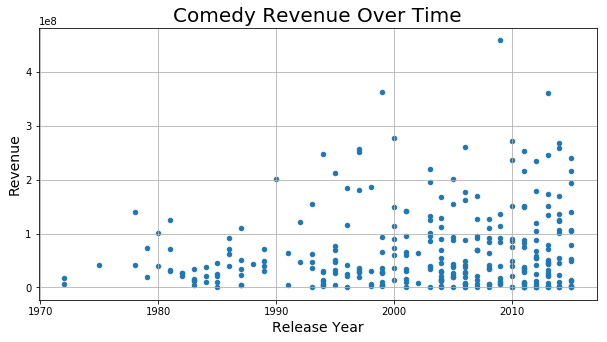

In [146]:
# Has the revenue for comedy movies increased over time?
comedy.plot(x = "release_year", y = "revenue", kind = "scatter", figsize = (10, 5))
plt.xlabel('Release Year',size = 14)
plt.ylabel('Revenue',size = 14)
plt.title("Comedy Revenue Over Time", size = 20)
plt.grid(True);

## Top 5 Directors

I extracted the director column from the dataframe and generated a value count using the .value_counts() method.

<b> Which directors have produced the most movies? </b>

The 5 directors with the most movies are Woody Allen, Clint Eastwood, Martin Scorsese, Steven Spielberg, and Ridley Scott.

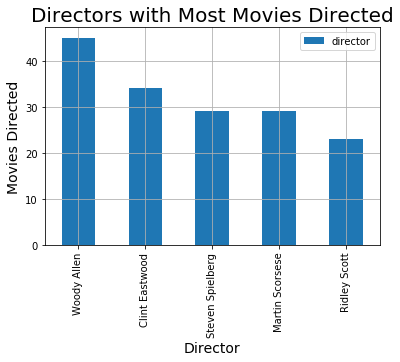

In [148]:
director = df["director"].value_counts()
director.head(5).plot.bar()
plt.xlabel('Director', size = 14)
plt.ylabel('Movies Directed',size = 14)
plt.title("Directors with Most Movies Directed", size = 20)
plt.grid(True)
plt.legend()
plt.show();

In [40]:
director.head(5)

Woody Allen         45
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     29
Ridley Scott        23
Name: director, dtype: int64

## Explore the Director with the Most Movies: Woody Allen

Query the dataframe to extract all movies directed by Woody Allen using the .query() method.

In [42]:
# Query the dataset for movies directed by Woody Allen
woody_allen = df.query("director == 'Woody Allen'")
woody_allen.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
155,1.007054,11000000.0,27391084.0,Irrational Man,Woody Allen,95,Mystery|Drama,2015-07-17,319,6.1,2015
790,0.889247,NaN,32339326.0,Magic in the Moonlight,Woody Allen,97,Comedy|Drama|Romance,2014-07-25,464,6.3,2014
1332,1.179653,4000000.0,38251425.0,Annie Hall,Woody Allen,93,Comedy|Drama|Romance,1977-04-19,493,7.6,1977
1489,0.804857,15000000.0,NaN,Whatever Works,Woody Allen,92,Comedy|Romance,2009-06-19,174,6.7,2009
2126,0.493121,22000000.0,NaN,You Will Meet a Tall Dark Stranger,Woody Allen,98,Comedy|Drama|Romance,2010-05-23,131,5.8,2010


I extracted the genre column and did a value count using the .value_counts() method

<b> What genre of movies does Woody Allen direct? </b>

For this analysis I extracted the genres from all Woody Allen movies then performed a value count using the .Value_counts() method. Woody Allen's genres directed can be viewed in the pie chart below. Woody Allen mostly directs comedy, drama, romance, or some subset of these genres. 

In [43]:
# What genres does he produce?
woody_genre = woody_allen["genres"].value_counts()

In [44]:
woody_genre.head(10)

Comedy|Drama|Romance      7
Comedy|Drama              7
Comedy                    4
Comedy|Romance            4
Drama                     3
Fantasy|Comedy|Romance    2
Action|Comedy             1
Drama|Comedy|Romance      1
Comedy|Crime              1
Action|Comedy|Crime       1
Name: genres, dtype: int64

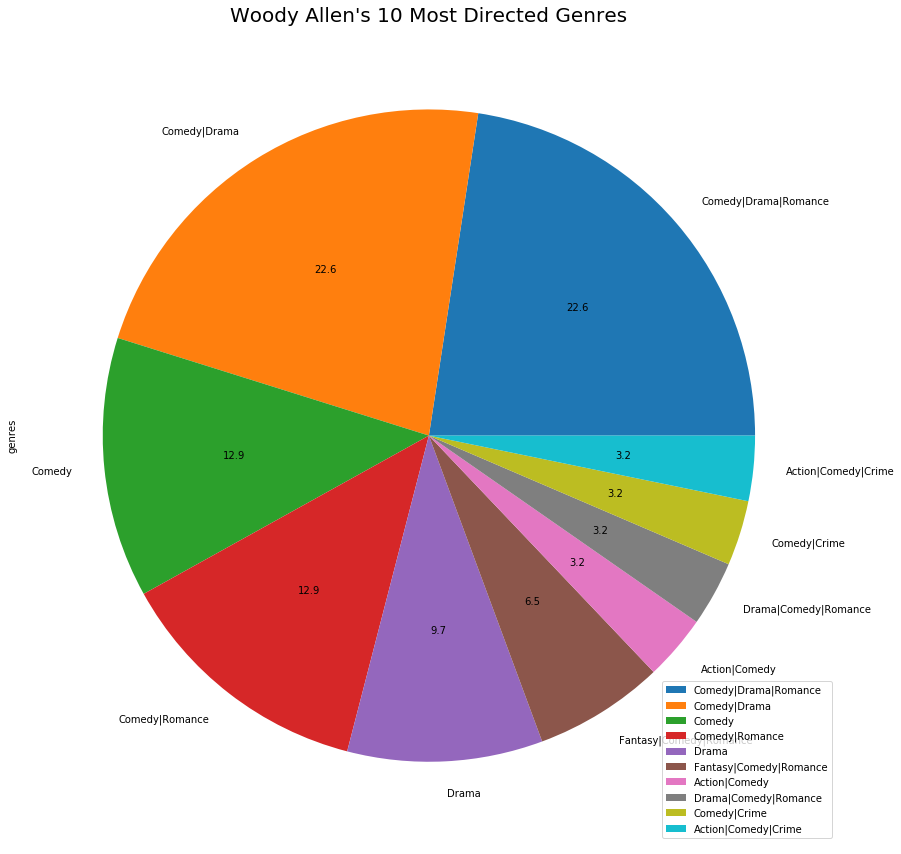

In [153]:
woody_genre.head(10).plot(kind = "pie", autopct ='%.1f', figsize = (15, 15))
plt.title("Woody Allen's 10 Most Directed Genres", size = 20)
plt.legend();

I extracted the revenue column and looked at the statistics using the .describe() method.

<b> What is the average revenue of a Woody Allen directed movie? </b>

$ 38,728,390

In [46]:
# What type of revenue do these movies bring
woody_allen["revenue"].describe()

count    2.200000e+01
mean     3.872839e+07
std      3.829263e+07
min      2.735731e+06
25%      1.141384e+07
50%      2.373845e+07
75%      4.004973e+07
max      1.511192e+08
Name: revenue, dtype: float64

I extracted the 10 largest revenue films using the .nlargest() method.

<b> What are Woody Allen's top ten highest revenue films? </b>

In [47]:
woody_allen.nlargest(10, "revenue")

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
3429,1.367727,30000000.0,151119219.0,Midnight in Paris,Woody Allen,94,Fantasy|Comedy|Romance,2011-05-11,1117,7.2,2011
5551,0.926390,18000000.0,97505481.0,Blue Jasmine,Woody Allen,98,Comedy|Drama,2013-07-25,680,6.9,2013
2964,0.866771,15000000.0,96408652.0,Vicky Cristina Barcelona,Woody Allen,96,Drama|Romance,2008-08-15,563,6.7,2008
6248,1.051177,15000000.0,85306374.0,Match Point,Woody Allen,124,Drama|Thriller|Crime|Romance,2005-05-12,620,7.1,2005
4493,0.714232,17000000.0,73244881.0,To Rome with Love,Woody Allen,111,Romance|Comedy,2012-04-20,298,5.5,2012
10519,0.476819,6400000.0,40084041.0,Hannah and Her Sisters,Woody Allen,107,Comedy|Drama,1986-02-07,102,7.3,1986
7835,0.961390,NaN,39946780.0,Manhattan,Woody Allen,96,Comedy|Drama|Romance,1979-04-25,310,7.7,1979
1332,1.179653,4000000.0,38251425.0,Annie Hall,Woody Allen,93,Comedy|Drama|Romance,1977-04-19,493,7.6,1977
790,0.889247,NaN,32339326.0,Magic in the Moonlight,Woody Allen,97,Comedy|Drama|Romance,2014-07-25,464,6.3,2014
6721,0.489898,4000000.0,31584901.0,Scoop,Woody Allen,96,Comedy|Mystery,2006-07-27,208,6.2,2006


<b> Are Woody Allen's new films generating more revenue? </b>

For this analysis I extracted Woody Allen's 15 highest revenue films and the created a scatter plot with the x-axis being release year and the y-axis being revenue.

The scatterplot shows a positive trend meaning that his newer movies are generating more revenue. His 5 highest revenue films were directed between 2005-2015.

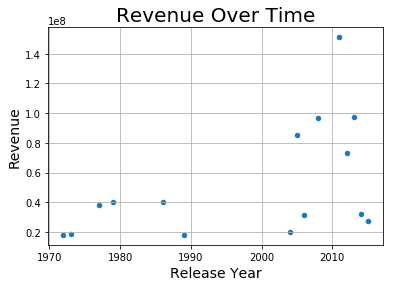

In [155]:
## Are his newer films generating more revenue?
woody_allen.nlargest(15, "revenue").plot(kind = "scatter", x = "release_year", y = "revenue")
plt.xlabel('Release Year',size=14)
plt.ylabel('Revenue',size=14)
plt.title("Revenue Over Time", size = 20)
plt.grid(True);

I extracted the 10 most popular movies using the .nlargest() method.

<b> What are Woody Allen's top 10 most popular movies? </b>

In [49]:
# What are his ten most popular movies?
woody_allen.nlargest(10, "popularity")

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
3429,1.367727,30000000.0,151119219.0,Midnight in Paris,Woody Allen,94,Fantasy|Comedy|Romance,2011-05-11,1117,7.2,2011
1332,1.179653,4000000.0,38251425.0,Annie Hall,Woody Allen,93,Comedy|Drama|Romance,1977-04-19,493,7.6,1977
6248,1.051177,15000000.0,85306374.0,Match Point,Woody Allen,124,Drama|Thriller|Crime|Romance,2005-05-12,620,7.1,2005
155,1.007054,11000000.0,27391084.0,Irrational Man,Woody Allen,95,Mystery|Drama,2015-07-17,319,6.1,2015
7835,0.961390,NaN,39946780.0,Manhattan,Woody Allen,96,Comedy|Drama|Romance,1979-04-25,310,7.7,1979
5551,0.926390,18000000.0,97505481.0,Blue Jasmine,Woody Allen,98,Comedy|Drama,2013-07-25,680,6.9,2013
790,0.889247,NaN,32339326.0,Magic in the Moonlight,Woody Allen,97,Comedy|Drama|Romance,2014-07-25,464,6.3,2014
2964,0.866771,15000000.0,96408652.0,Vicky Cristina Barcelona,Woody Allen,96,Drama|Romance,2008-08-15,563,6.7,2008
1489,0.804857,15000000.0,NaN,Whatever Works,Woody Allen,92,Comedy|Romance,2009-06-19,174,6.7,2009
8119,0.773291,15000000.0,6700000.0,Mighty Aphrodite,Woody Allen,95,Comedy|Romance,1995-09-13,61,6.5,1995


<b> Are Woody Allen's movies getting more popular over time? </b>

For this analysis I extracted Woody Allen's 15 most popular films and the created a scatter plot with the x-axis being release year and the y-axis being popularity.

The scatter plot shows that Woody Allen's movie popularity was high in the late 1970's and decreased through the 1980's and 1990's but then increased to their highest popularity in the 2000's.

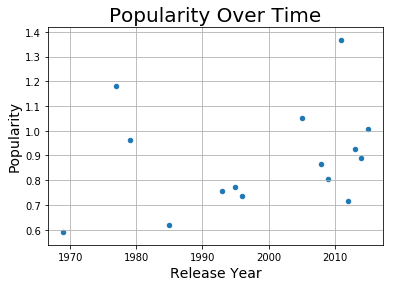

In [157]:
# Are his movies getting more popular over time?
woody_allen.nlargest(15, "popularity").plot(kind = "scatter", x = "release_year", y = "popularity")
plt.xlabel('Release Year',size=14)
plt.ylabel('Popularity',size=14)
plt.title("Popularity Over Time", size = 20)
plt.grid(True);

<b> Does Woody Allen's runtime correlate to popularity? </b>

For this analyis I created a box plot that is grouped by runtime and the column is popularity.

Woody Allen's most popular movies appear to run between 92 to 97 minutes.

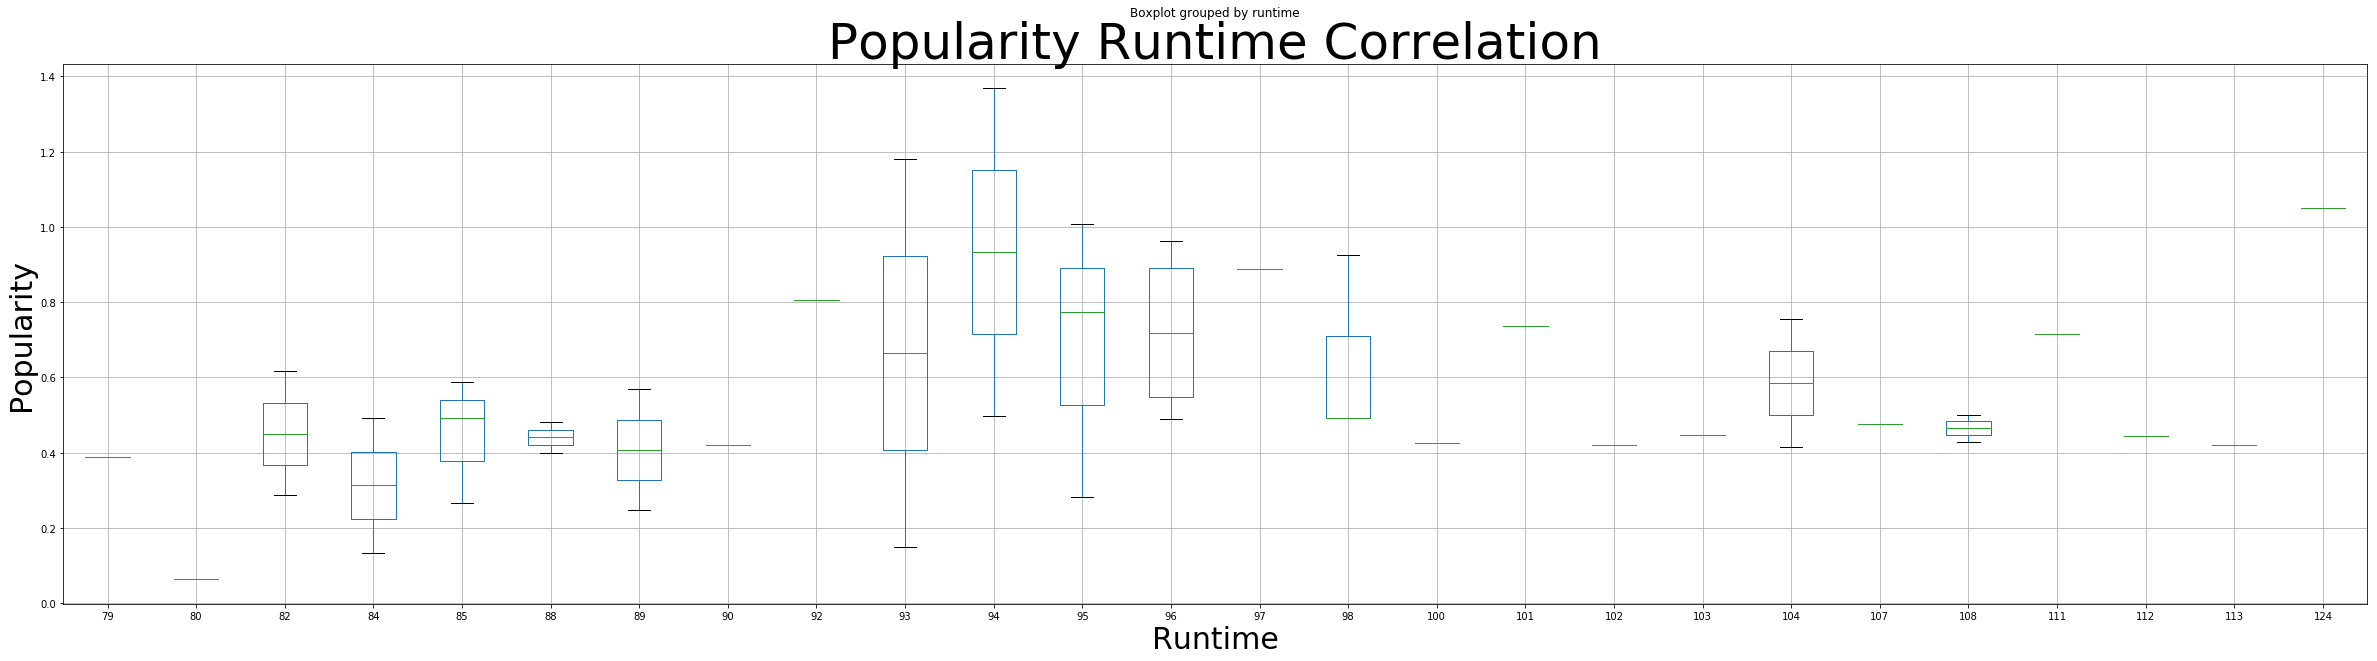

In [159]:
woody_allen.boxplot(column = "popularity", by = "runtime", figsize =(40, 10))
plt.xlabel('Runtime',size = 30)
plt.ylabel('Popularity',size = 30)
plt.title("Popularity Runtime Correlation", size = 50)
plt.grid(True);

## Explore the Director with the Second Most Movies: Clint Eastwood

Query the dataframe to extract all movies directed by Clint Eastwood using the .query() method.

In [52]:
# Query the dataset for movies directed by Clint Eastwood
clint_eastwood = df.query("director == 'Clint Eastwood'")
clint_eastwood.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
657,3.863074,58800000.0,542307423.0,American Sniper,Clint Eastwood,134,War|Action,2014-12-11,3004,7.5,2014
803,0.797723,40000000.0,67347013.0,Jersey Boys,Clint Eastwood,134,Music|Drama,2014-06-05,181,6.7,2014
1344,0.495480,5500000.0,26414658.0,The Gauntlet,Clint Eastwood,109,Drama|Action|Crime|Thriller,1977-12-21,45,6.7,1977
1499,0.756385,60000000.0,122233971.0,Invictus,Clint Eastwood,134,Drama|History,2009-12-10,675,6.9,2009
2086,0.598275,50000000.0,105197635.0,Hereafter,Clint Eastwood,129,Drama|Fantasy,2010-10-15,279,5.5,2010


I extracted the genre column and did a value count using the .value_counts() method


<b> What genre of movies does Clint Eastwood direct? </b>

For this analysis I extracted the genres from all Clint Eastwood movies then performed a value count. Clint Eastwood's genres directed can be viewed in the pie chart below. Clint Eastwood directs a wide array of movies, many are crime, drama, thriller, or some subset of these genres.

In [53]:
# What genres does he produce?
clint_genre = clint_eastwood["genres"].value_counts()

In [54]:
clint_genre.head(10)

Drama                                 2
Western                               2
Crime|Drama|Mystery|Thriller          2
Drama|Romance                         2
Crime|Drama|Thriller                  2
Action|Adventure|Thriller             1
Thriller|Crime|Drama|Mystery          1
Drama|Action|Comedy|Crime|Thriller    1
Crime|Drama|Mystery                   1
Romance|Western                       1
Name: genres, dtype: int64

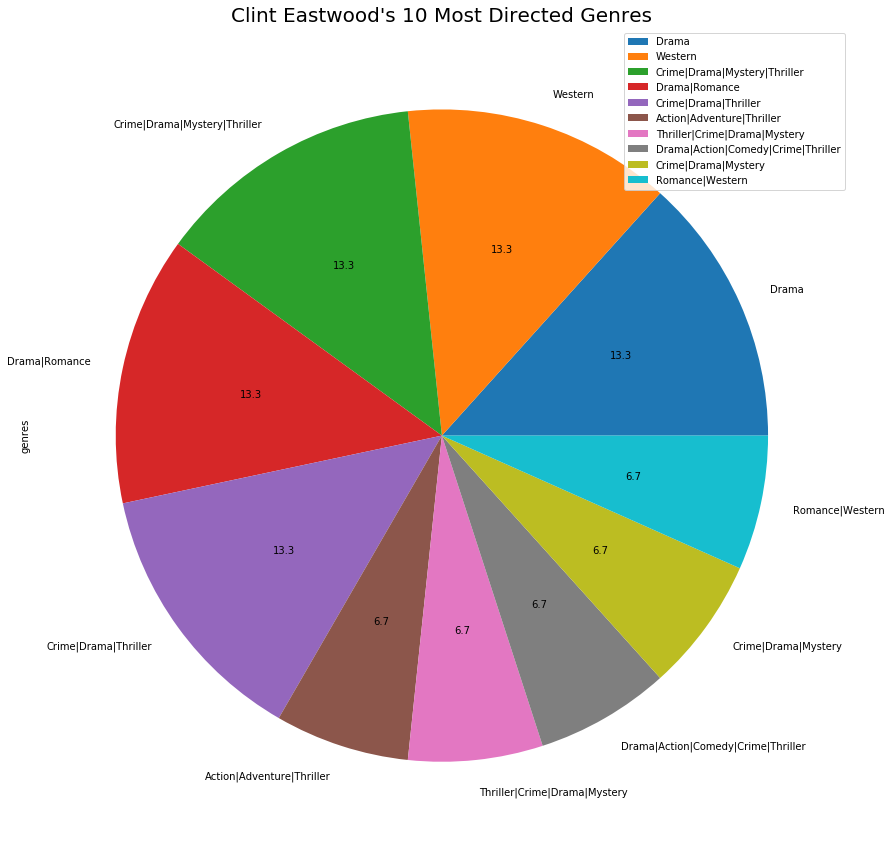

In [162]:
# What are his most produced genres?
clint_genre.head(10).plot(kind = "pie", autopct ='%.1f', figsize = (15, 15))
plt.title("Clint Eastwood's 10 Most Directed Genres", size = 20)
plt.legend();

I extracted the revenue column and looked at the statistics using the .describe() method.

<b> What is the average revenue of a Clint Eastwood directed film? </b>

$108,648,900

In [56]:
# What type of revenue do these movies bring
clint_eastwood["revenue"].describe()

count    2.600000e+01
mean     1.086489e+08
std      1.101745e+08
min      1.060000e+07
25%      4.173893e+07
50%      6.968029e+07
75%      1.335693e+08
max      5.423074e+08
Name: revenue, dtype: float64

I extracted the 10 largest revenue films using the .nlargest() method.

<b> What are Clint Eastwoods's top ten highest revenue films? </b>

In [57]:
# What are his top 10 earning films
clint_eastwood.nlargest(10, "revenue")

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
657,3.863074,58800000.0,542307423.0,American Sniper,Clint Eastwood,134,War|Action,2014-12-11,3004,7.5,2014
2888,2.245306,33000000.0,269958228.0,Gran Torino,Clint Eastwood,116,Drama,2008-12-09,1809,7.6,2008
6990,1.648554,30000000.0,216763646.0,Million Dollar Baby,Clint Eastwood,132,Drama,2004-12-14,1355,7.6,2004
8092,1.173191,24000000.0,182016617.0,The Bridges of Madison County,Clint Eastwood,135,Drama|Romance,1995-05-28,189,6.9,1995
8261,0.841580,14000000.0,159157447.0,Unforgiven,Clint Eastwood,131,Western,1992-08-07,602,7.5,1992
4983,1.428302,25000000.0,156822020.0,Mystic River,Clint Eastwood,138,Thriller|Crime|Drama|Mystery,2003-10-07,743,7.4,2003
10231,1.190247,30000000.0,135130999.0,A Perfect World,Clint Eastwood,138,Crime|Drama|Thriller,1993-11-24,188,6.9,1993
8710,0.743732,65000000.0,128884132.0,Space Cowboys,Clint Eastwood,130,Action|Adventure|Thriller,2000-07-31,211,6.2,2000
1499,0.756385,60000000.0,122233971.0,Invictus,Clint Eastwood,134,Drama|History,2009-12-10,675,6.9,2009
2945,1.043504,55000000.0,113020255.0,Changeling,Clint Eastwood,141,Crime|Drama|Mystery,2008-01-30,642,7.1,2008


<b> Are Clint Eastwood's new films generating more revenue? </b>

For this analysis I extracted Clint Eastwood's 15 highest revenue films and the created a scatter plot with the x-axis being release year and the y-axis being revenue.

The scatterplot shows a positive trend meaning Clint Eastwood's newer films are generating more revenue.

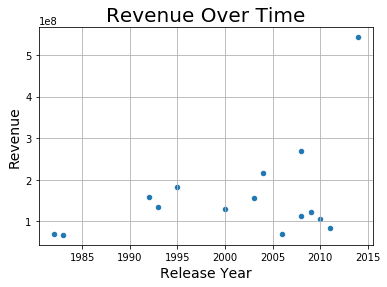

In [164]:
# Are his newer films generating more revenue?
clint_eastwood.nlargest(15, "revenue").plot(kind = "scatter", x = "release_year", y = "revenue")
plt.xlabel('Release Year',size=14)
plt.ylabel('Revenue',size=14)
plt.title("Revenue Over Time", size = 20)
plt.grid(True);

I extracted the 10 most popular films using the .nlargest() method.

<b> What are Clint Eastwood's top 10 most popular movies? </b>

In [59]:
# What are his ten most popular movies?
clint_eastwood.nlargest(10, "popularity")

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
657,3.863074,58800000.0,542307423.0,American Sniper,Clint Eastwood,134,War|Action,2014-12-11,3004,7.5,2014
2888,2.245306,33000000.0,269958228.0,Gran Torino,Clint Eastwood,116,Drama,2008-12-09,1809,7.6,2008
6990,1.648554,30000000.0,216763646.0,Million Dollar Baby,Clint Eastwood,132,Drama,2004-12-14,1355,7.6,2004
4983,1.428302,25000000.0,156822020.0,Mystic River,Clint Eastwood,138,Thriller|Crime|Drama|Mystery,2003-10-07,743,7.4,2003
10231,1.190247,30000000.0,135130999.0,A Perfect World,Clint Eastwood,138,Crime|Drama|Thriller,1993-11-24,188,6.9,1993
8092,1.173191,24000000.0,182016617.0,The Bridges of Madison County,Clint Eastwood,135,Drama|Romance,1995-05-28,189,6.9,1995
6610,1.103135,90000000.0,65900249.0,Flags of Our Fathers,Clint Eastwood,132,War|Drama|History,2006-10-19,308,6.7,2006
2945,1.043504,55000000.0,113020255.0,Changeling,Clint Eastwood,141,Crime|Drama|Mystery,2008-01-30,642,7.1,2008
8261,0.841580,14000000.0,159157447.0,Unforgiven,Clint Eastwood,131,Western,1992-08-07,602,7.5,1992
10603,0.799740,NaN,NaN,High Plains Drifter,Clint Eastwood,105,Western,1973-04-19,126,7.1,1973


<b> Are Clint Eastwood's movies getting more popular over time? </b>

For this analysis I extracted Clint Eastwood's 15 most popular films and the created a scatter plot with the x-axis being release year and the y-axis being popularity.

The scatterplot shows a positive trend meaning that Clint Eastwood's movies are getting more popular over time. The 2000's contain Clint Eastwood's most popular movies. His most popular movie was released in 2014.

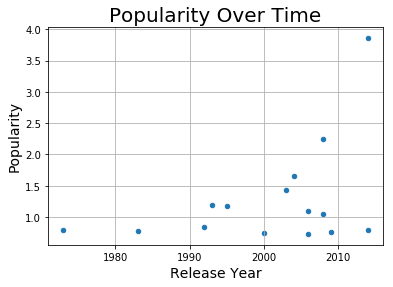

In [165]:
# Are his movies getting more popular over time?
clint_eastwood.nlargest(15, "popularity").plot(kind = "scatter", x = "release_year", y = "popularity")
plt.xlabel('Release Year',size=14)
plt.ylabel('Popularity',size=14)
plt.title("Popularity Over Time", size = 20)
plt.grid(True);

<b> Does Clint Eastwood's runtime correlate to popularity? </b>

For this analyis I created a box plot that is grouped by runtime and the column is popularity.

The boxplot shows that Clint Eastwood's most popular films have a runtime between 130-141 minutes. Clint Eastwood also has high popularity movies that run between 115-121 minutes.

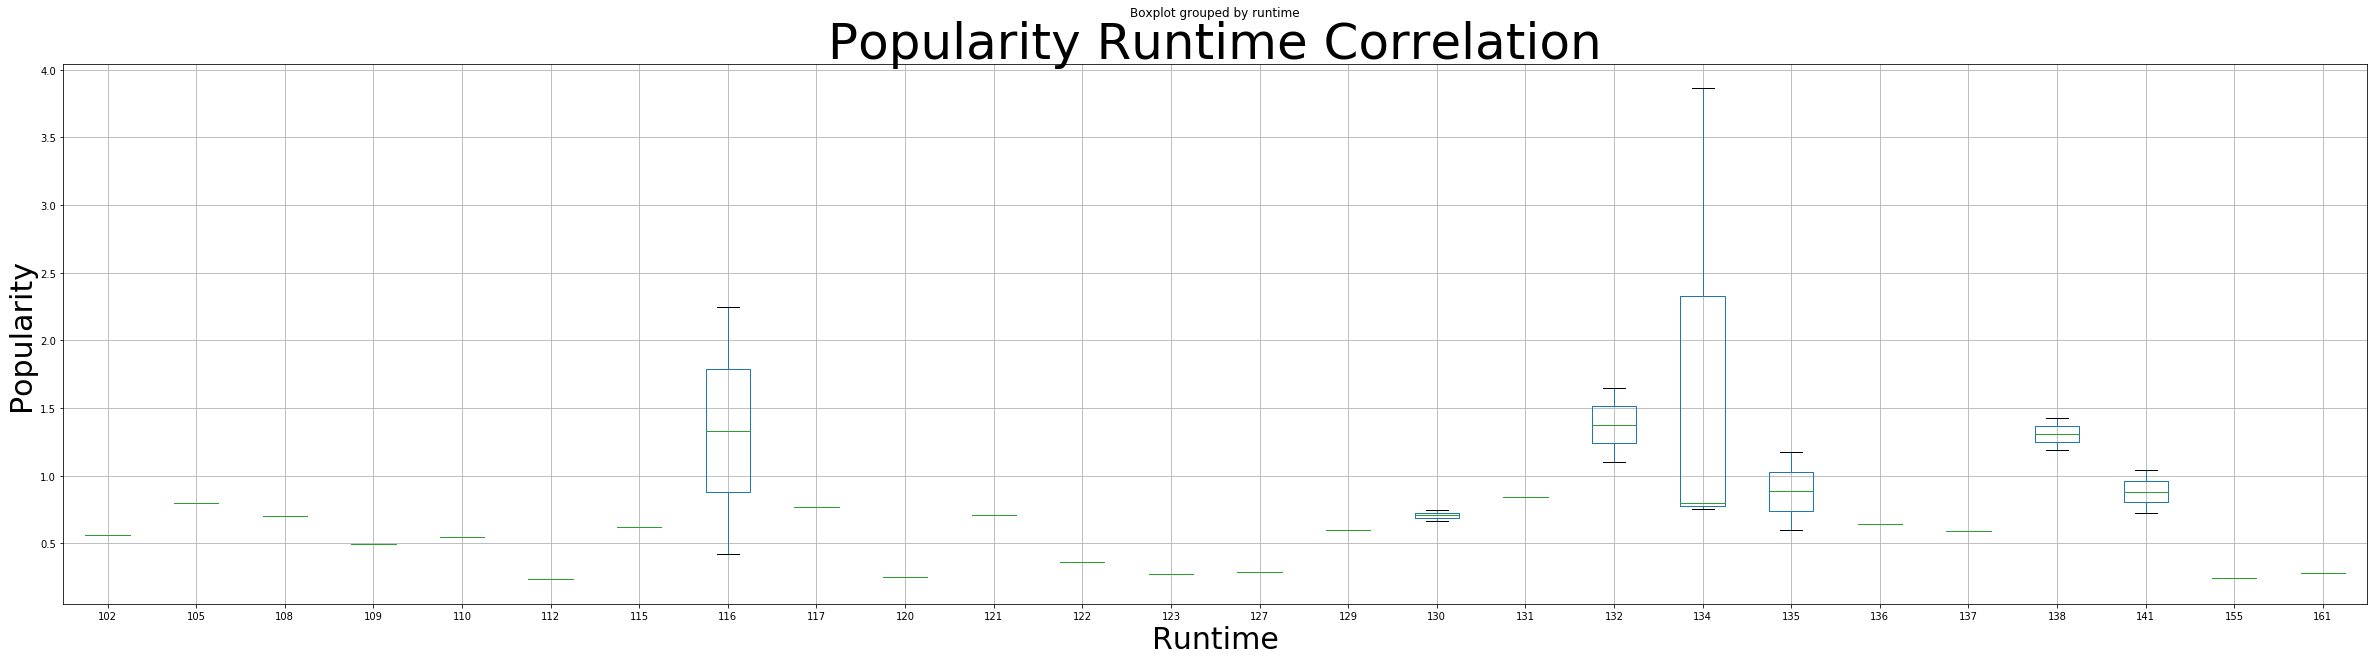

In [166]:
clint_eastwood.boxplot(column = "popularity", by = "runtime", figsize =(40, 10))
plt.xlabel('Runtime',size = 30)
plt.ylabel('Popularity',size = 30)
plt.title("Popularity Runtime Correlation", size = 50)
plt.grid(True);

## Conclusion

<b> What are the top 10 produced movie genres of all time? </b>
1. Drama                   
2. Comedy                  
3. Documentary             
4. Drama|Romance           
5. Comedy|Drama            
6. Comedy|Romance          
7. Horror|Thriller         
8. Horror                  
9. Comedy|Drama|Romance    
10. Drama|Thriller         


<b> Explore the top 2 genres </b>

<b> Drama </b>

-What is the average runtime?

111.72 minutes

-What is the average revenue?

$45,642,090

-What length are most drama movies?

Medium length

-Is this genre of movies being produced at an increasing rate?

Yes

-Is the average popularity of these movies increasing?

The overall trend the line chart shows is that the average popularity is increasing. There is some variation in the trend, especially in years where there was a widely popular drama movies, as seen in the mid 1970's and the late 1990's.

-Has the budget increased over time?

The budget of drama movies has significantly increased over time. The peak years for high budget drama movies is between 2000-2010 where several movies have a budget of over $100,000,000.

-Has the revenue increased over time?

The revenue of drama movies has increased over time but has plateued near $400,000, other than one movie who's revenue was 611,899,420. Drama movies began reaching this threshold of revenue in the late 1980's and more consistently reached it through the 1990's and 2000's.


<b> Comedy </b>

-What is the average runtime?

93.66 minutes

-What is the average revenue?

$67,521,230

-What length are most comedy movies? 

Medium length

-Is this genre of movies being produced at an increasing rate?

Yes

-Is the average popularity of these movies increasing?

Average popularity is increasing. An interesting variation noticed in the data is that there is a spike nearly every twenty years correlating to releases of very popular come
-Has the budget increased over time?

The budget for comedy has increased over time, especially during the 1990's and 2000's. The early 2000's saw several movies with budgets of over $100,000,000.

-Has the revenue increased over time?

Revenue has increased over time. Comedy movies started to generate significant revenue in the 1990s and this trend continued into the 2000's.



<b> Which directors have made the most movies? </b>

1. Woody Allen         
2. Clint Eastwood      
3. Martin Scorsese     
4. Steven Spielberg    
5. Ridley Scott        

<b> Explore the top 2 directors </b>

<b> Woody Allen </b>

-What genres do they direct?

Woody Allen mostly directs comedy, drama, romance, or some subset of these genres.

-What is the average revenue for their movies?

$ 38,728,390

-What are their 10 highest revenue films?

1. Midnight in Paris
2. Blue Jasmine
3. Vicky Cristina Barcelona
4. Match Point
5. To Rome with Love
6. Hannah and Her Sisters
7. Manhattan
8. Annie Hall
9. Magic in the Moonlight
10. Scoop


-Are their newer films generating more revenue?

Yes, his newer movies are generating more revenue. His 5 highest revenue films were directed between 2005-2015.

-What are their 10 most popular films?

1. Midnight in Paris
2. Annie Hall
3. Match Point
4. Irrational Man
5. Manhattan
6. Blue Jasmine
7. Moonlight
8. Vicky Cristina Barcelona
9. Whatever Works
10. Mighty Aphrodite

-Are their films getting more popular over time?

Woody Allen's movie popularity was high in the late 1970's and decreased through the 1980's and 1990's but then increased to their highest popularity in the 2000's.

-What runtime correlates to their highest popularity?

Woody Allen's most popular movies appear to run between 92 to 97 minutes.

<b> Clint Eastwood </b>

-What genres do they direct?

Clint Eastwood directs a wide array of movies, many are crime, drama, thriller, or some subset of these genres.

-What is the average revenue for their movies?

$108,648,900

-What are their 10 highest revenue films?

1. American Sniper
2. Gran Torino
3. Million Dollar Baby
4. The Bridges of Madison County
5. Unforgiven
6. Mystic River
7. A Perfect World
8. Space Cowboys
9. Invictus
10. Changeling	

-Are their newer films generating more revenue?

Clint Eastwood's newer films are generating more revenue.

-What are their 10 most popular films?

1. American Sniper
2. Gran Torino
3. Million Dollar Baby
4. Mystic River
5. A Perfect World
6. The Bridges of Madison County
7. Flags of Our Fathers
8. Changeling
9. Unforgiven
10. High Plains Drifter

-Are their films getting more popular over time?

Clint Eastwood's movies are getting more popular over time. The 2000's contain Clint Eastwood's most popular movies. His most popular movie was released in 2014.

-What runtime correlates to their highest popularity?

Clint Eastwood's most popular films have a runtime between 130-141 minutes. Clint Eastwood also has high popularity movies that run between 115-121 minutes.

### Limitations

Nearly half of the budget and revenue values were missing in this dataset so analysis on these values is tentative. A small number of values were missing in the runtime but not enough to make a significant impact. Popularity values have no indication on how it was measured.  

### Works Cited

Data Analysis with Pandas and Python by Boris Paskhaver
https://www.udemy.com/course/data-analysis-with-pandas/